# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus componentes principales, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [63]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [64]:
data = pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\2-No_Supervisado\1-PCA\Practica\data\nndb_flat.csv')
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [65]:
data.shape

(8618, 45)

In [66]:
data.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

C:\Users\mareg\AppData\Local\Temp\ipykernel_21528\16841779.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


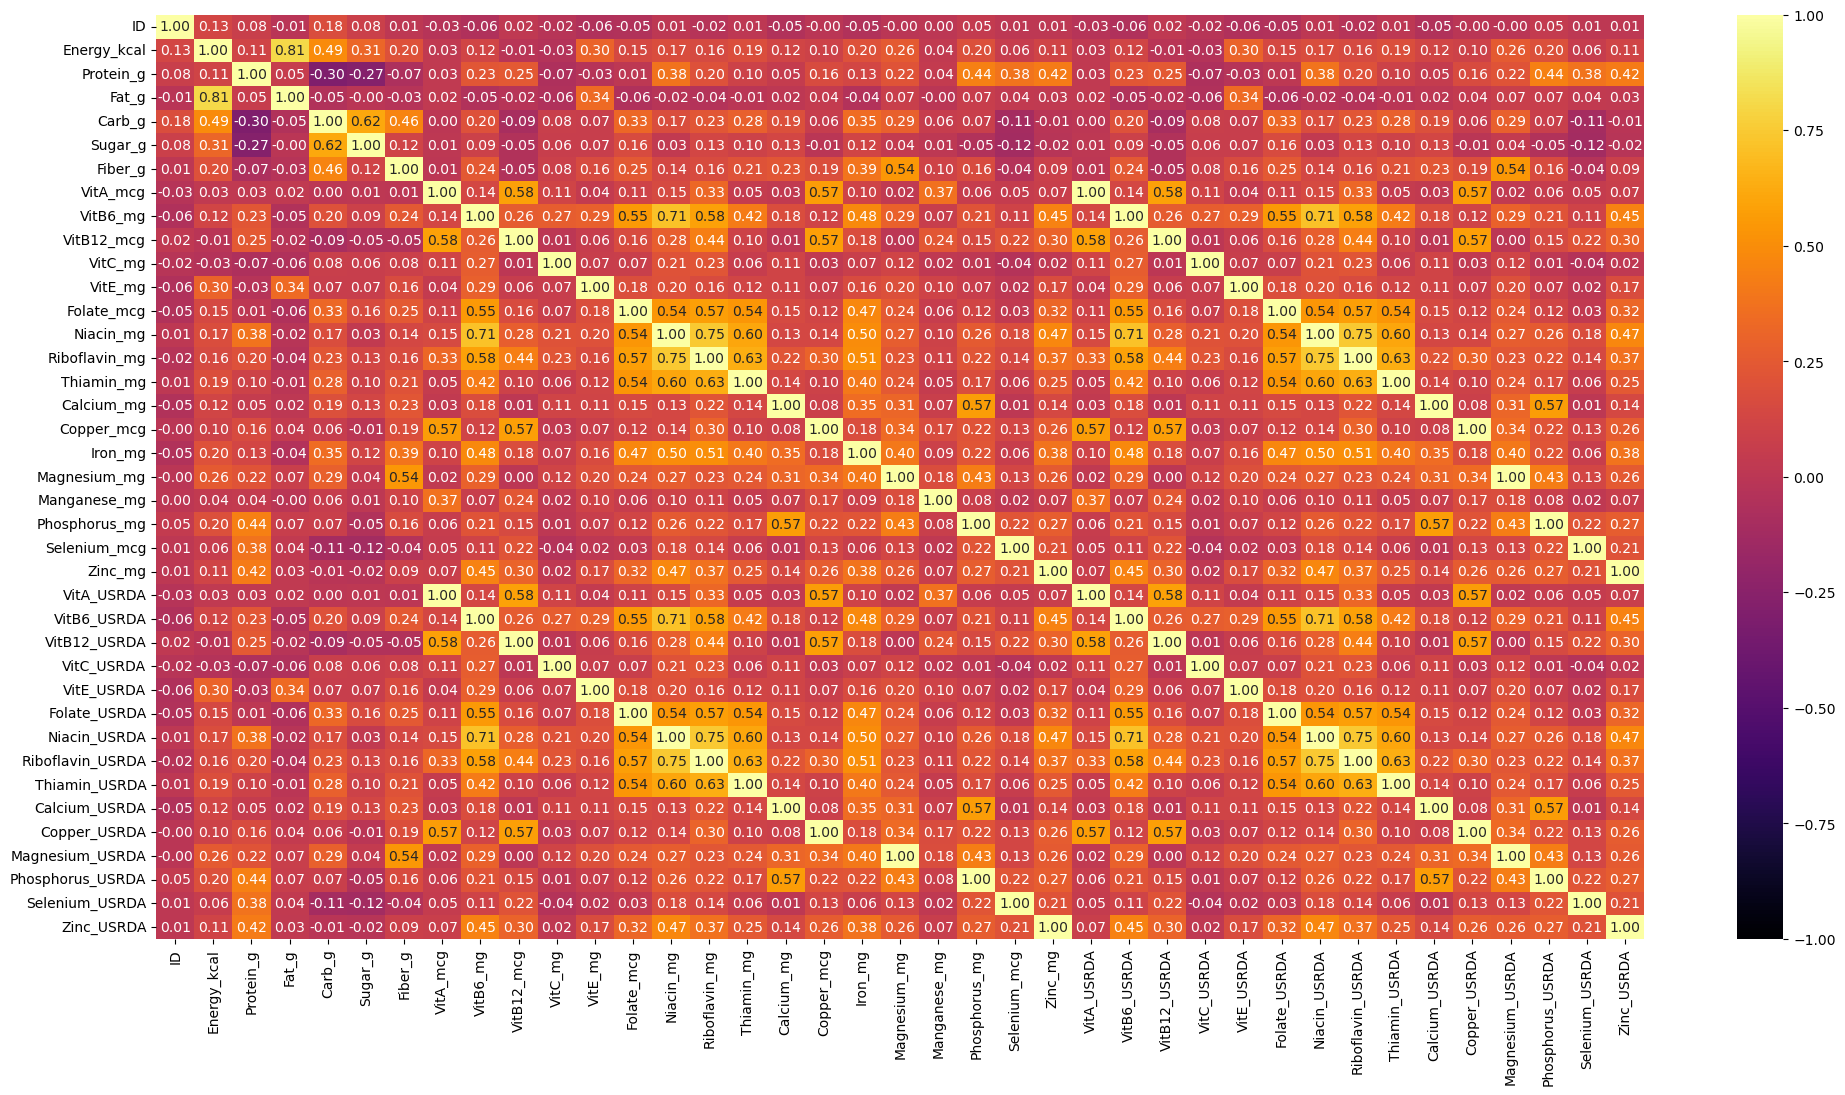

In [68]:
corr_mat = data.corr()
plt.subplots(figsize=(24, 12))

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr_mat, annot=True, cmap='inferno', fmt=".2f", vmin=-1, vmax=1, center=0, )

plt.show()

In [69]:

# variables numéricas
variables_numericas = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = variables_numericas.corr()
print(correlation_matrix)

                        ID  Energy_kcal  Protein_g     Fat_g    Carb_g  \
ID                1.000000     0.126126   0.075538 -0.011996  0.177297   
Energy_kcal       0.126126     1.000000   0.110302  0.806795  0.487096   
Protein_g         0.075538     0.110302   1.000000  0.054715 -0.301974   
Fat_g            -0.011996     0.806795   0.054715  1.000000 -0.054116   
Carb_g            0.177297     0.487096  -0.301974 -0.054116  1.000000   
Sugar_g           0.082710     0.313151  -0.266170 -0.001962  0.615344   
Fiber_g           0.008252     0.197338  -0.072777 -0.028842  0.458192   
VitA_mcg         -0.031211     0.026329   0.026483  0.024379  0.001871   
VitB6_mg         -0.060463     0.121872   0.228485 -0.046950  0.195571   
VitB12_mcg        0.016512    -0.012292   0.245423 -0.020786 -0.094636   
VitC_mg          -0.020974    -0.033495  -0.066456 -0.059993  0.076745   
VitE_mg          -0.056898     0.303701  -0.029481  0.338008  0.070298   
Folate_mcg       -0.051166     0.14593

In [70]:
# columnas con correlación igual a 1
columnas_seleccionadas = correlation_matrix.columns[(correlation_matrix > 0.99).any()]
nombres_columnas = list(columnas_seleccionadas)

print(nombres_columnas)

['ID', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA']


In [71]:
#  columnas a eliminar
columnas_a_eliminar = ['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA']

# Eliminar del dataframe original
data_sin_USRDA = data.drop(columnas_a_eliminar, axis=1)

data_sin_USRDA.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


C:\Users\mareg\AppData\Local\Temp\ipykernel_21528\1898601402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= data_sin_USRDA.corr()


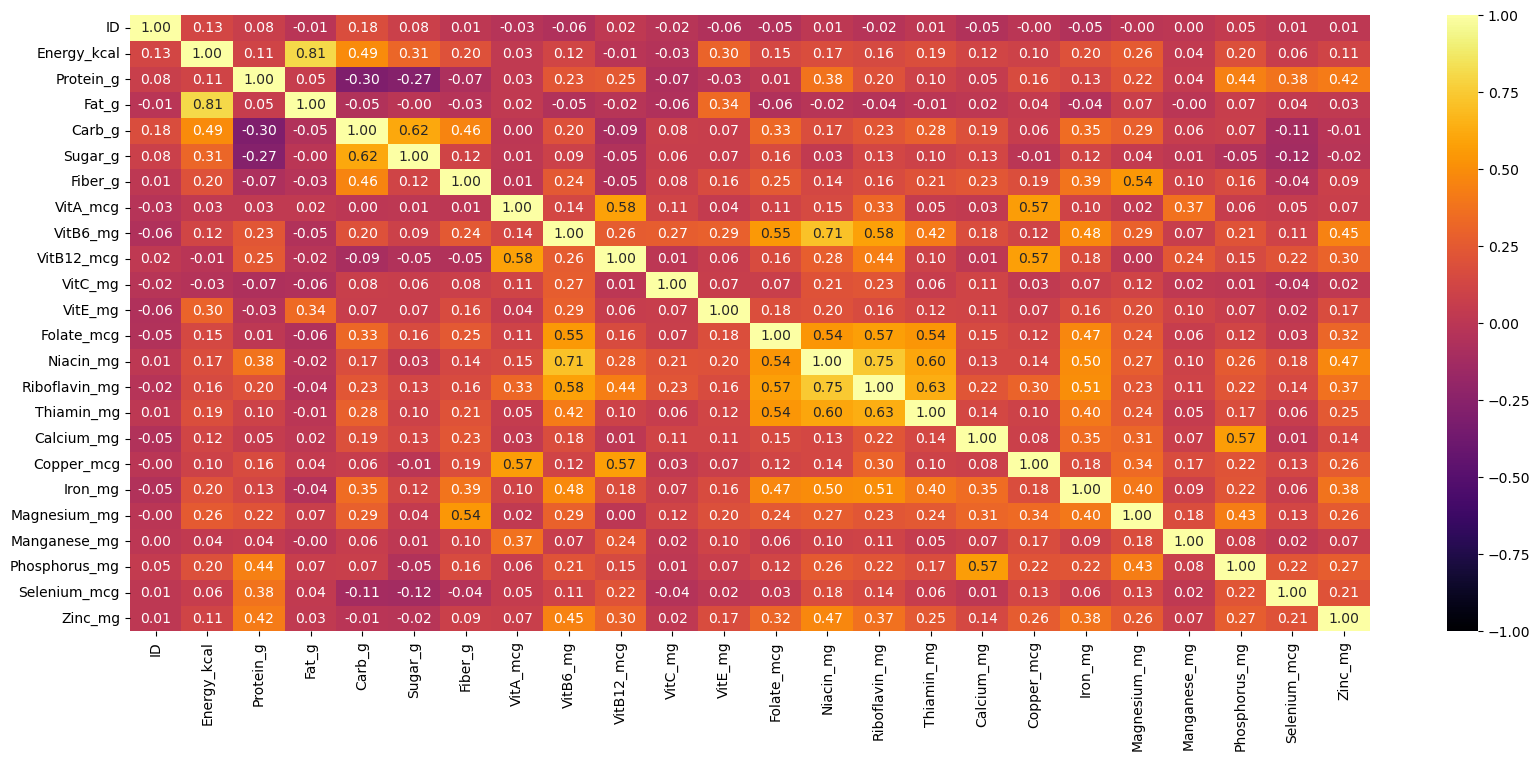

In [72]:
corr= data_sin_USRDA.corr()
plt.subplots(figsize=(20, 8))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, annot=True, cmap='inferno', fmt=".2f", vmin=-1, vmax=1, center=0, )

plt.show()

### Variables no numéricas
Elimina las variables de texto del dataset

In [73]:

columnas_texto = data_sin_USRDA.select_dtypes(include=['object']).columns

data_num = data_sin_USRDA.drop(columnas_texto, axis=1)
data_num.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:

# transformación logarítmica sumando 1
log_data = np.log1p(data_num)
#  nombres de las columnas originales para no perder los nombres
columnas = data_num.columns



### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [76]:

scaler = StandardScaler()
data_n = pd.DataFrame(scaler.fit_transform(log_data), columns=columnas, index=log_data.index)
data_n.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,-3.480717,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,...,-0.685619,-0.682602,0.043491,-0.624237,-1.290969,-1.323615,-0.478294,-0.607193,-0.700775,-1.026533
1,-3.479343,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,...,-0.685619,-0.682602,0.043491,-0.545958,-1.110402,-1.323615,-0.467870,-0.630949,-0.700775,-1.080292
2,-3.477969,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,...,-0.816970,-0.700558,-1.024481,-0.619308,-1.318770,-2.173767,-0.478294,-1.673624,-1.184060,-1.136139
3,-3.476598,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,...,0.653867,-0.576344,2.068775,-0.430822,-0.939676,0.285544,-0.454898,0.988529,0.726947,0.715166
4,-3.475227,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,...,0.549115,-0.642461,2.230503,-0.507280,-0.816626,0.317134,-0.447146,1.077376,0.726947,0.691398


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [77]:
from sklearn.decomposition import PCA
perform = PCA()
pca = perform.fit_transform(data_n)


### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

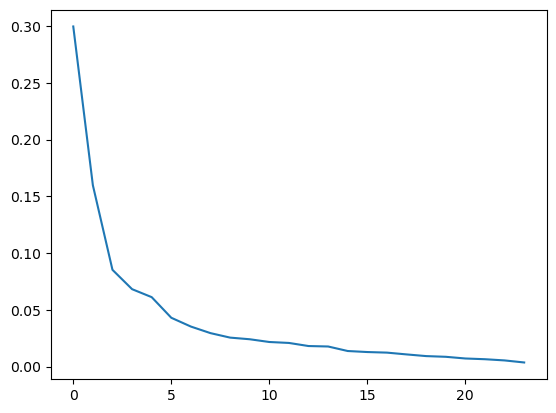

In [78]:
plt.plot(fitter.explained_variance_ratio_)

In [80]:
perform.explained_variance_ratio_

array([0.29975904, 0.15981448, 0.08527285, 0.06822611, 0.06119781,
       0.04301872, 0.03526472, 0.0294758 , 0.02552534, 0.0240854 ,
       0.02166582, 0.02083199, 0.01810563, 0.01770336, 0.01371603,
       0.01280991, 0.01229936, 0.01072188, 0.00924002, 0.0086169 ,
       0.00712834, 0.00648294, 0.00542513, 0.00361241])

In [82]:
var_expl = perform.explained_variance_ratio_
explained_variance_ratio_cumulative = np.cumsum(var_expl)
print(explained_variance_ratio_cumulative)

[0.29975904 0.45957353 0.54484638 0.61307248 0.6742703  0.71728901
 0.75255374 0.78202954 0.80755488 0.83164028 0.8533061  0.87413809
 0.89224372 0.90994708 0.92366311 0.93647302 0.94877238 0.95949426
 0.96873428 0.97735118 0.98447952 0.99096246 0.99638759 1.        ]


Me quedaría con 6 o 7 componentes principales

In [84]:
perform.explained_variance_ratio_[:7].sum()

0.7525537363575051

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [85]:
pca=PCA(n_components=7) 
pca.fit(data_n) 
data_pca=pca.transform(data_n) #  nuevas dimensiones de PCA

In [94]:
columnas_pca = data_n.columns[:7]  # columnas que corresponden al PCA

data_pca_df = pd.DataFrame(data_pca, columns=columnas_pca)
data_pca_df.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g
0,-2.254172,-0.864286,0.068354,0.725154,5.309599,0.277818,1.945376
1,-2.221566,-0.805947,0.048070,0.716533,5.282424,0.318000,1.973748
2,-3.381271,-1.038798,-0.474535,1.650218,5.350550,1.293340,2.082909
3,1.409058,-1.152703,1.430829,-0.616322,3.647029,-2.148960,2.208044
4,1.123787,-1.093037,1.326558,-0.858796,3.929626,-2.391431,2.149001


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [95]:
#  índices que ordenan los valores de cada PC de forma descendente
pc_indices_descendente = np.argsort(data_pca, axis=0)[::-1]

# los tres grupos de alimentos con los valores más altos en cada PC
num_top_groups = 3  # Número de grupos de alimentos con los valores más altos en cada PC
top_groups = []
for pc in range(data_pca.shape[1]):
    top_group_indices = pc_indices_descendente[:num_top_groups, pc]
    top_group_names = data['FoodGroup'].iloc[top_group_indices]
    top_groups.append(top_group_names)

for pc, groups in enumerate(top_groups):
    print(f"Componente Principal {pc+1}:")
    for i, group in enumerate(groups):
        print(f"Grupo {i+1}: {group}")
    print()

Componente Principal 1:
Grupo 1: Breakfast Cereals
Grupo 2: Breakfast Cereals
Grupo 3: Breakfast Cereals

Componente Principal 2:
Grupo 1: Beverages
Grupo 2: Vegetables and Vegetable Products
Grupo 3: Vegetables and Vegetable Products

Componente Principal 3:
Grupo 1: Beverages
Grupo 2: Beverages
Grupo 3: Poultry Products

Componente Principal 4:
Grupo 1: Breakfast Cereals
Grupo 2: Breakfast Cereals
Grupo 3: Breakfast Cereals

Componente Principal 5:
Grupo 1: Fats and Oils
Grupo 2: Fats and Oils
Grupo 3: Fats and Oils

Componente Principal 6:
Grupo 1: Beef Products
Grupo 2: Beef Products
Grupo 3: Beverages

Componente Principal 7:
Grupo 1: Baby Foods
Grupo 2: Baby Foods
Grupo 3: Baby Foods

